In [1]:
#Import libraries
#import ee
#import geemap

In [2]:
#Authenticate and connect your google GEE account here.
#ee.Authenticate()
#ee.Initialize(project= 'ee-aravinthraja')

In [3]:
Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

NDVI - Normalized Difference Vegetation Index (NDVI) is a remote sensing technique that measures the health and density of vegetation. It's used in agriculture, forestry, and ecology to monitor plant growth and health

https://www.usgs.gov/landsat-missions/landsat-normalized-difference-vegetation-index

https://www.sciencedirect.com/topics/earth-and-planetary-sciences/normalized-difference-vegetation-index

https://earthobservatory.nasa.gov/features/MeasuringVegetation/measuring_vegetation_2.php
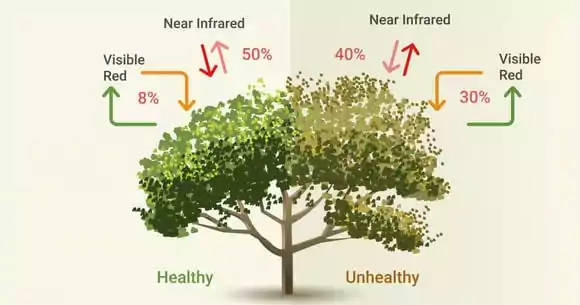

https://eos.com/blog/ndvi-faq-all-you-need-to-know-about-ndvi/

In [17]:
India  = ee.FeatureCollection('projects/ee-aravinthraja/assets/India_districts')
UDUPI = India.filter(ee.Filter.eq('District','UDUPI'))
Map.addLayer(UDUPI, {}, 'UDUPI')
Map.center_object(UDUPI,9)
Map


Map(bottom=250302.0, center=[13.498101887332847, 74.87208436292036], controls=(WidgetControl(options=['positio…

In [23]:
Landsat_filtered = LANDSAT.filterBounds(UDUPI).filterDate("2024-03-01","2024-06-30").filterMetadata('CLOUD_COVER','less_than',8).mean().clip(UDUPI)
vis_params = {'bands': ['SR_B6', 'SR_B5', 'SR_B4'], 'gamma': 0.77, 'min': 7846.0, 'max': 21115.25}
Map.addLayer(Landsat_filtered, vis_params,'L9_654')
Map

Map(bottom=485180.0, center=[13.405650601795035, 74.93705718175961], controls=(WidgetControl(options=['positio…

In [25]:
NDVI = Landsat_filtered.normalizedDifference(['SR_B5','SR_B4'])
NDVI_Palette = {'bands': ['nd'], 'palette': ['#0a3cf9', '#f3c920', '#f32720', '#88ff75', '#4ee337', '#1d6f10'], 'min': 0.09899145287810568, 'max': 0.4671430609412894}
Map.addLayer(NDVI, NDVI_Palette,'NDVI')
Map

Map(bottom=485163.0, center=[13.411327994909957, 74.90854848285288], controls=(WidgetControl(options=['positio…

In [26]:
# Mask the non-watery parts of the image, where NDWI < 0.4.
ndviMasked = NDVI.updateMask(NDVI.gte(0.25))
Map.addLayer(ndviMasked, {}, 'NDVI_masked')

# Display the map
Map

Map(bottom=485201.0, center=[13.398637166362194, 74.96040344238283], controls=(WidgetControl(options=['positio…

# New Section